In [1]:
#TASK 2 [DATA COLLECTION & PREPARATION]

In [2]:
#importing the libraries

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score 

In [3]:
#Read the Dataset
df = pd.read_csv(r"/content/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
#DATA PREPARATION
# 1) Handling Missing data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [5]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

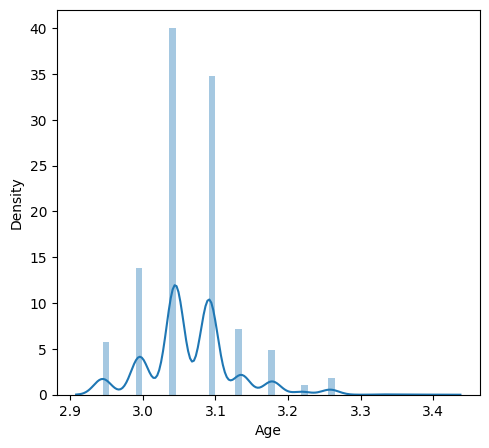

In [6]:
# 2) Handling outliers

def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)

transformationplot(np.log(df['Age']))

In [7]:
# Handling Categorical Values

df = df.replace(['Male'],[0])
df = df.replace(['Female'],[1])
df = df.replace(['Computer Science','Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],[0,1,2,3,4,5])

In [8]:
df = df.drop(['Hostel'], axis=1)
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


In [9]:
#TASK 3 [EXPLORATORY DATA ANALYSIS]
# Visual analysis

<Axes: xlabel='CGPA', ylabel='Density'>

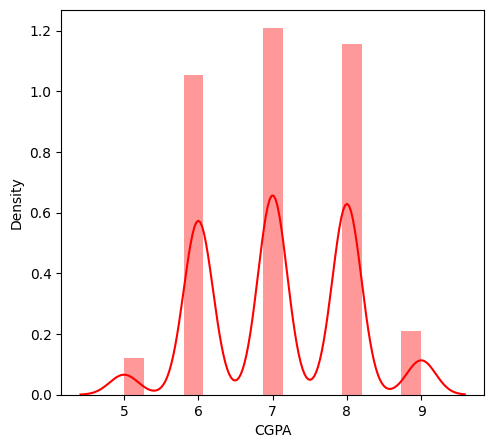

In [10]:
#Univariate analysis

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

<Axes: xlabel='PlacedOrNot', ylabel='Density'>

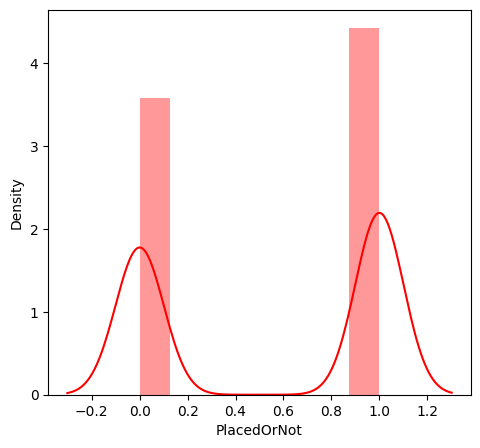

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')

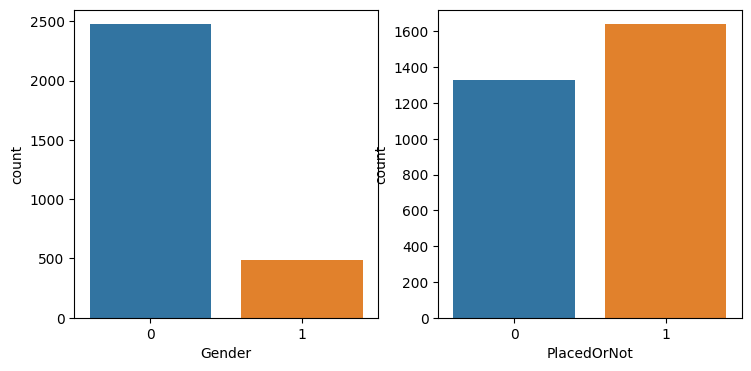

In [12]:
#Bivariate analysis

plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data=df,x=df['Gender'])
plt.subplot(1,4,2)
sns.countplot(data=df,x=df['PlacedOrNot'])
plt.show()


<Axes: xlabel='PlacedOrNot', ylabel='count'>

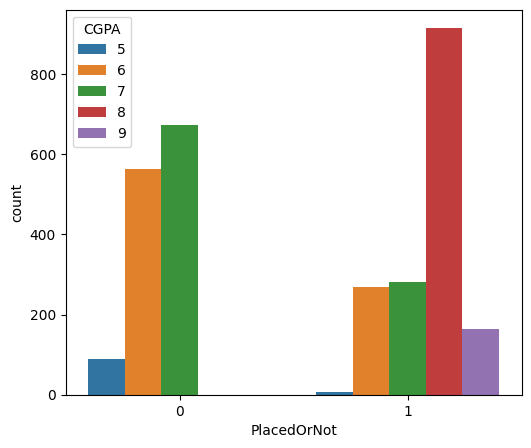

In [13]:
#Multivariate analysis

plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data=df,x=df["PlacedOrNot"],hue=df['CGPA'])

In [144]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


In [200]:
X = df.drop(columns='PlacedOrNot')
y = df['PlacedOrNot'].values

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=2)

In [202]:
#TASK 4 [MODEL BUILDING]
#Training the model in multiple algorithms

In [203]:
#SVM Model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)
SVC(kernel='linear')
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.7685497470489039


In [206]:
#KNN Model
best_k = {"Regular":0}
best_score = {"Regular":0}
for k in range(3,50,2):
  knn_temp = KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(X_train, Y_train)
  knn_temp_pred = knn_temp.predict(X_test)
  score = metrics.accuracy_score(Y_test, knn_temp_pred) * 100
  if score >= best_score["Regular"] and score < 100:
    best_score["Regular"] = score
    best_k["Regular"] = k
  else:
    best_score["Regular"] = score
    best_k["Regular"] = k
    break


In [207]:
print("---Results---\nK: {}\nScore: {}".format(best_k, best_score))

knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])

knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
testd = accuracy_score(knn_pred,Y_test)
print(testd)

---Results---
K: {'Regular': 7}
Score: {'Regular': 87.20538720538721}
0.8720538720538721


In [208]:
#Artificial neural network model

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [209]:
classifier = Sequential()

classifier.add(keras.layers.Dense(6,activation = 'relu'))
classifier.add(keras.layers.Dropout(0.50))

classifier.add(keras.layers.Dense(6,activation = 'relu'))
classifier.add(keras.layers.Dropout(0.50))

classifier.add(keras.layers.Dense(1,activation = 'sigmoid'))

In [210]:
loss_1 = tf.keras.losses.BinaryCrossentropy()

classifier.compile(optimizer = 'Adam', loss=loss_1, metrics=['accuracy'])

In [211]:
classifier.fit(X_train, Y_train, batch_size=20, epochs=100)

Epoch 1/100
119/119 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5510
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5527
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5527
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5527
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5527
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5527
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5527
Epoch 8/100
119/119 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5527
Epoch 9/100
119/119 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5527
Epoch 10/100
119/119 [==============================] - 0s 3ms/step - loss: 0.6877 - accura

In [123]:
#TASK 5 [MODEL DEPLOYMENT]

In [212]:
#Save the best model
## comparing all the trained models KNN has a better accuracy, so that we are using the KNN model for our use case.

import pickle
pickle.dump(knn,open("placement.pkl",'wb'))